In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class Label","Alcohol","Malic Acid"]
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [3]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


### Min Max Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((142, 2), (36, 2))

In [6]:
mms = MinMaxScaler()
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

In [7]:
x_train_scaled=pd.DataFrame(x_train_mms,columns=["Alcohol","Malic Acid"])
x_test_scaled=pd.DataFrame(x_test_mms,columns=["Alcohol","Malic Acid"])

## Now minimum value is and maximum value is 1

In [8]:
x_train_scaled.describe()

,Alcohol,Malic Acid
count,142.000000,142.000000
mean,0.512917,0.302143
std,0.215820,0.232980
min,0.000000,0.000000
25%,0.342763,0.147658
50%,0.521053,0.200611
75%,0.696711,0.457230
max,1.000000,1.000000


### Geometrical Intuition

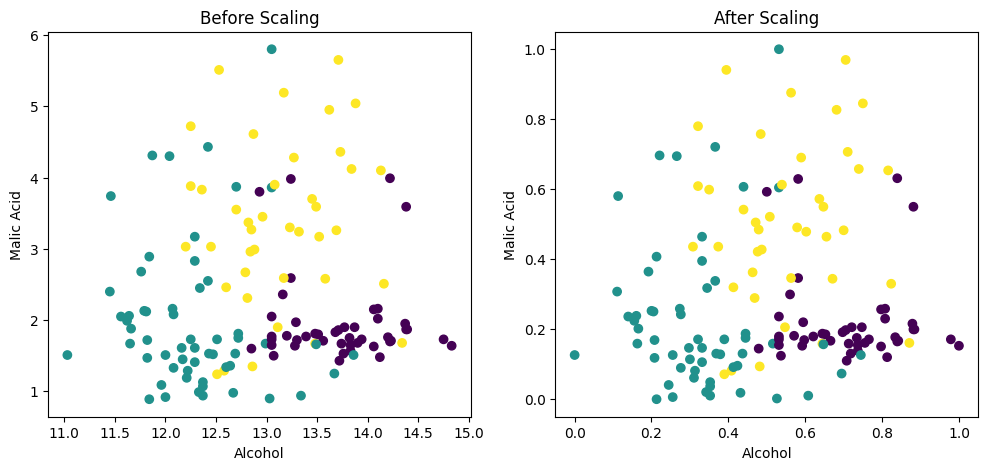

In [9]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"],c=y_train)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic Acid"],c=y_train)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()

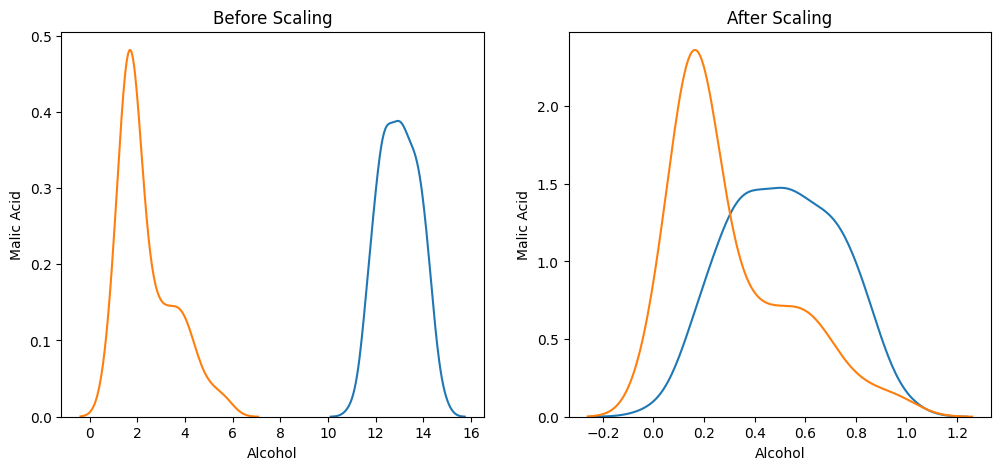

In [10]:
# now kde plot

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()


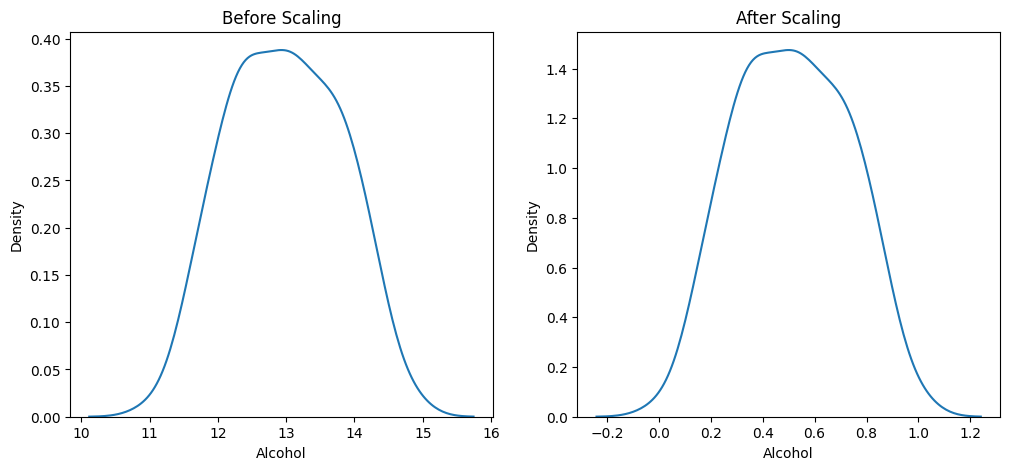

In [11]:
# now individually with alcohol

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()

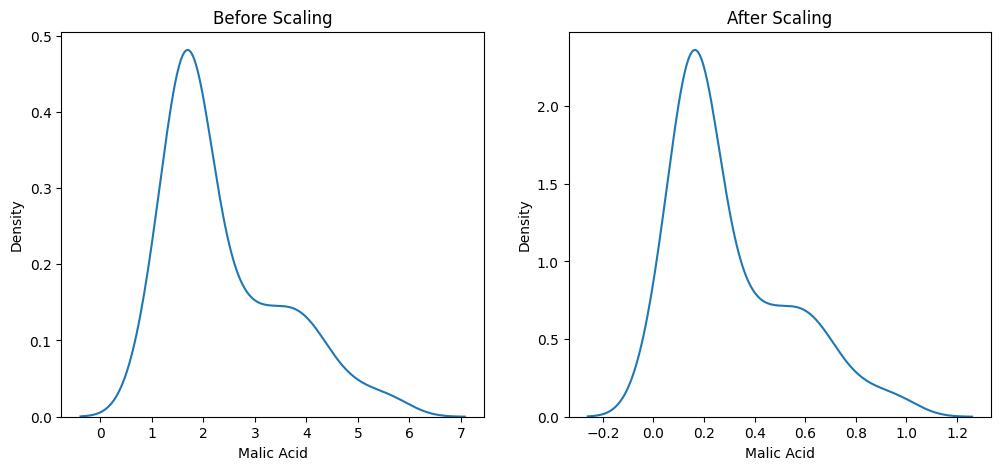

In [12]:
# with malic acid

fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Malic Acid")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Malic Acid")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()


### Mean Normalization

In [13]:
x_train_scaled = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_scaled = (x_test-x_train.mean())/(x_train.max()-x_train.min())
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,-0.0,0.0
std,0.2,0.2
min,-0.5,-0.3
25%,-0.2,-0.2
50%,0.0,-0.1
75%,0.2,0.2
max,0.5,0.7


In [14]:
# its like standardization but std is not 1 people gnerally use standardization

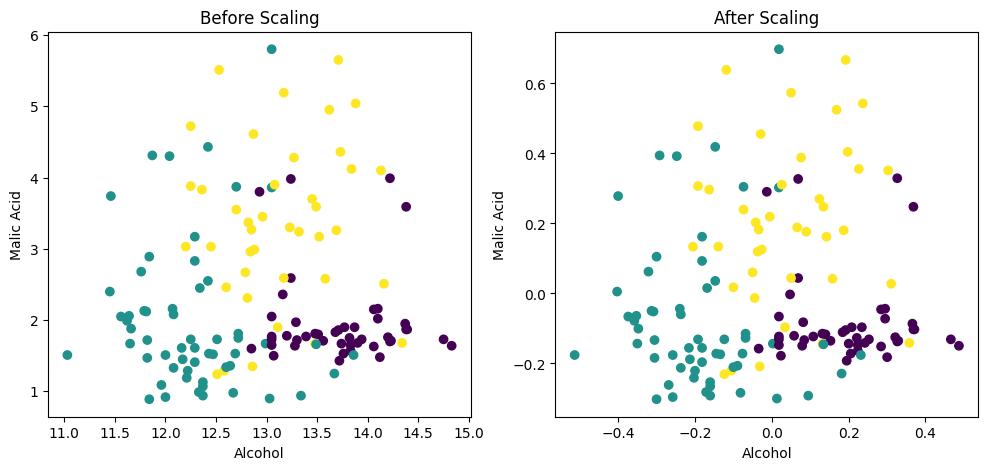

In [15]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"],c=y_train)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic Acid"],c=y_train)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()

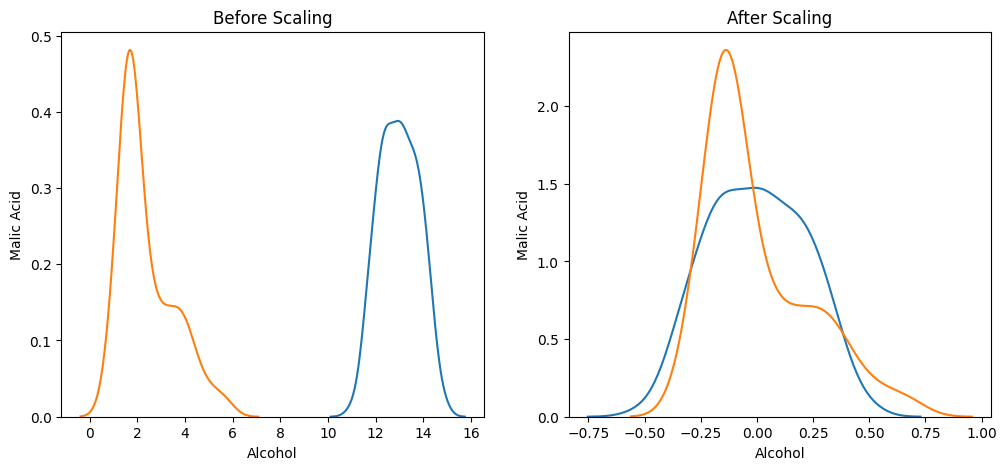

In [16]:
# now kde plot

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()


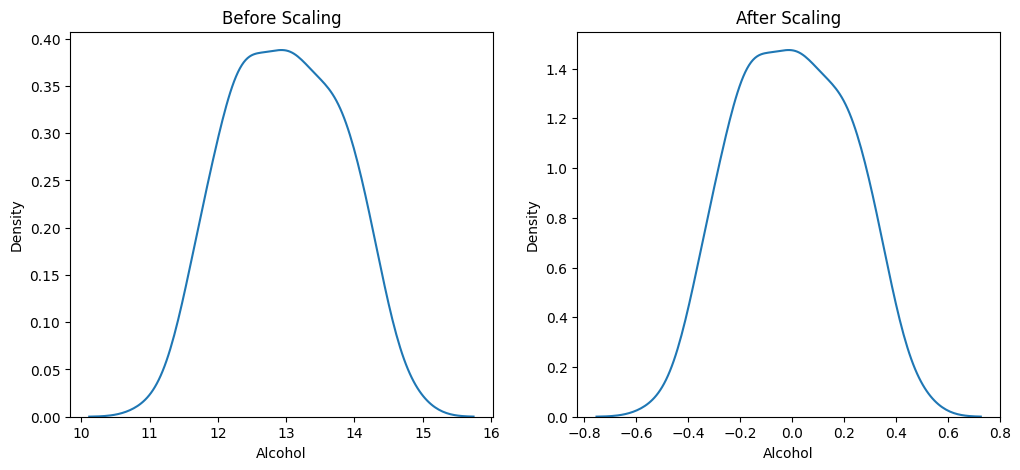

In [17]:
# now individually with alcohol

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()

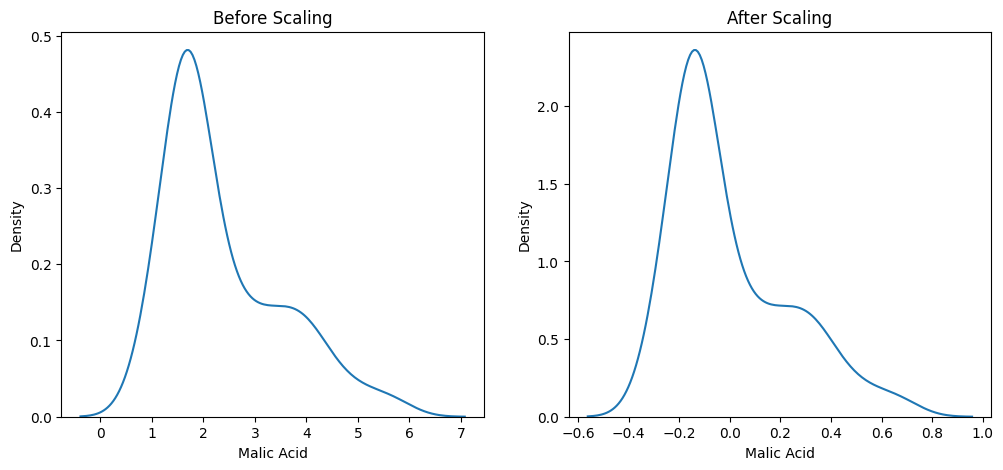

In [18]:
# with malic acid

fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Malic Acid")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Malic Acid")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()


### Max Abs Scaling

In [19]:
from sklearn.preprocessing import MaxAbsScaler

In [20]:
scaler = MaxAbsScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=["Alcohol","Malic Acid"])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=["Alcohol","Malic Acid"])

In [22]:
x_train_scaled.describe()

,Alcohol,Malic Acid
count,142.000000,142.000000
mean,0.875191,0.409228
std,0.055301,0.197230
min,0.743763,0.153448
25%,0.831591,0.278448
50%,0.877276,0.323276
75%,0.922286,0.540517
max,1.000000,1.000000


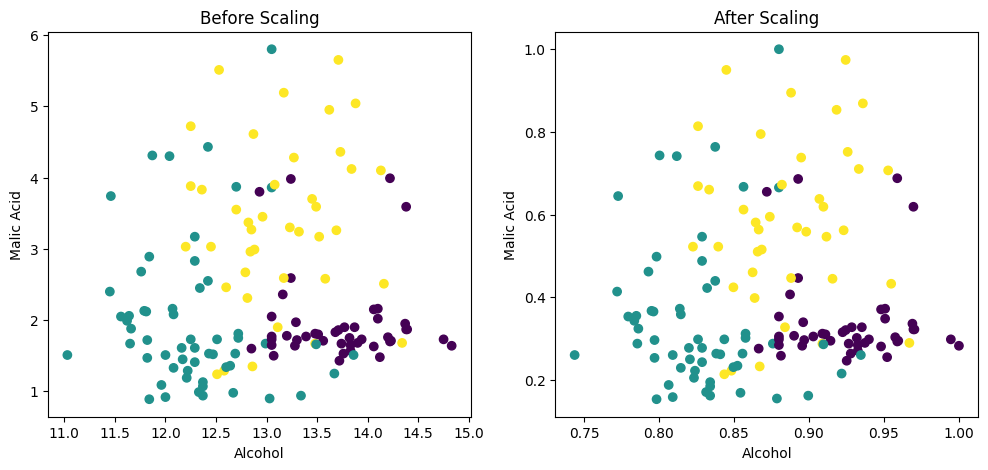

In [23]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"],c=y_train)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic Acid"],c=y_train)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()

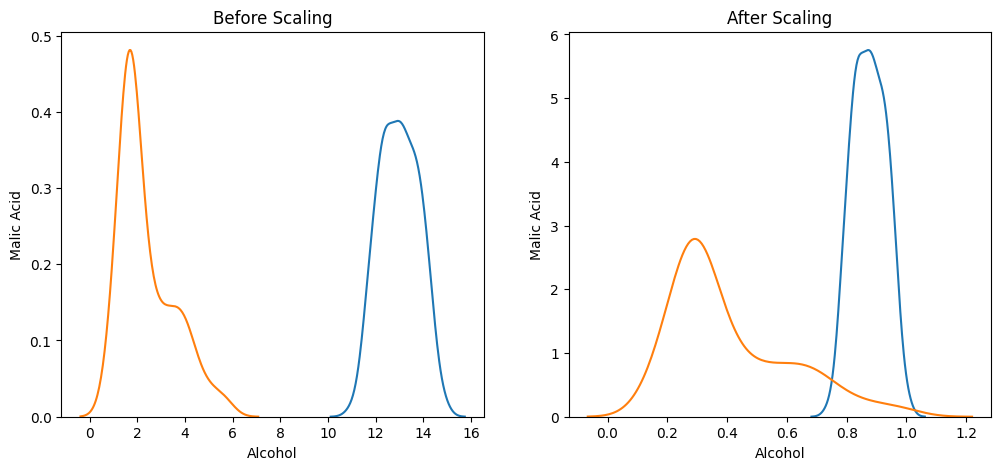

In [24]:
# now kde plot

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()


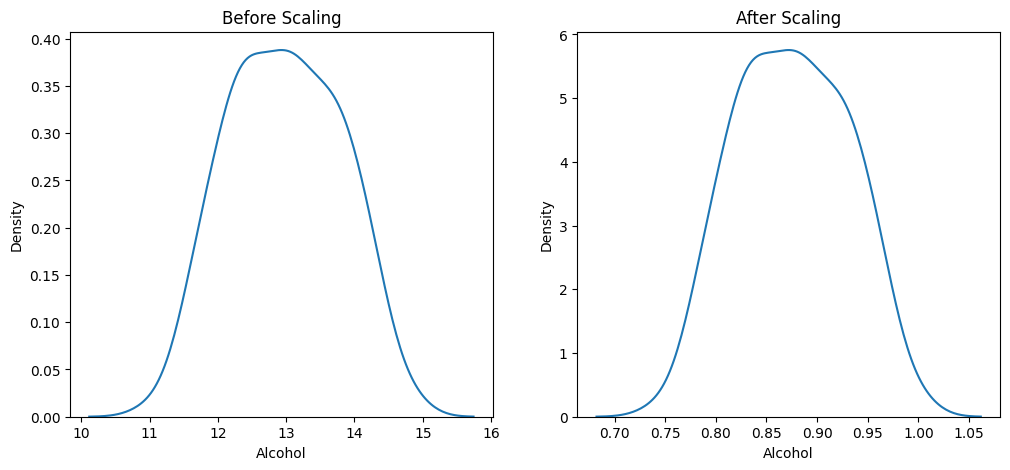

In [25]:
# now individually with alcohol

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()

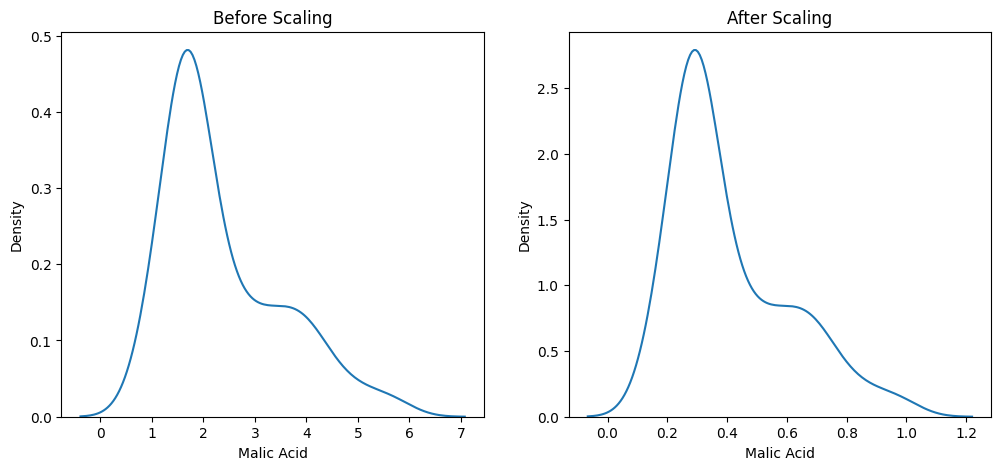

In [26]:
# with malic acid

fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Malic Acid")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Malic Acid")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()


### Robust scaler

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [29]:
df = pd.concat((df,pd.DataFrame({'Alcohol':[2,20,28],'Malic Acid':[10,12,-5],'Class Label':[2,1,1]})),ignore_index=True)

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

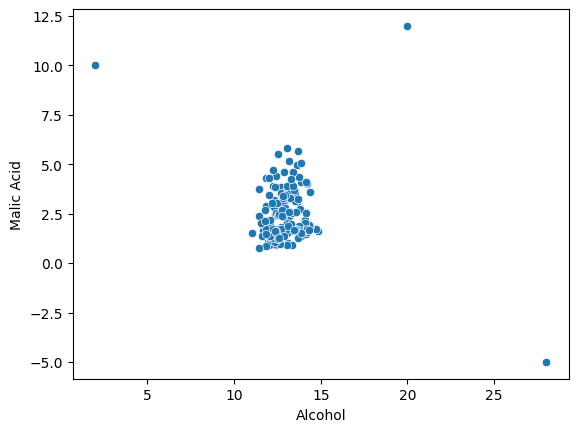

In [30]:
sns.scatterplot(x="Alcohol",y="Malic Acid",data=df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

x_train,x_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.2,random_state=42)

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=["Alcohol","Malic Acid"])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=["Alcohol","Malic Acid"])

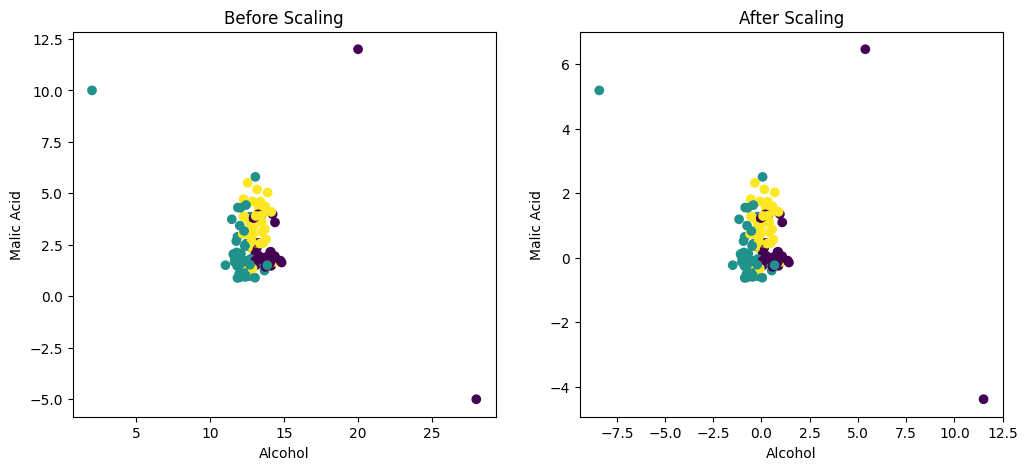

In [32]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"],c=y_train)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic Acid"],c=y_train)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")
ax2.set_title("After Scaling")
plt.show()

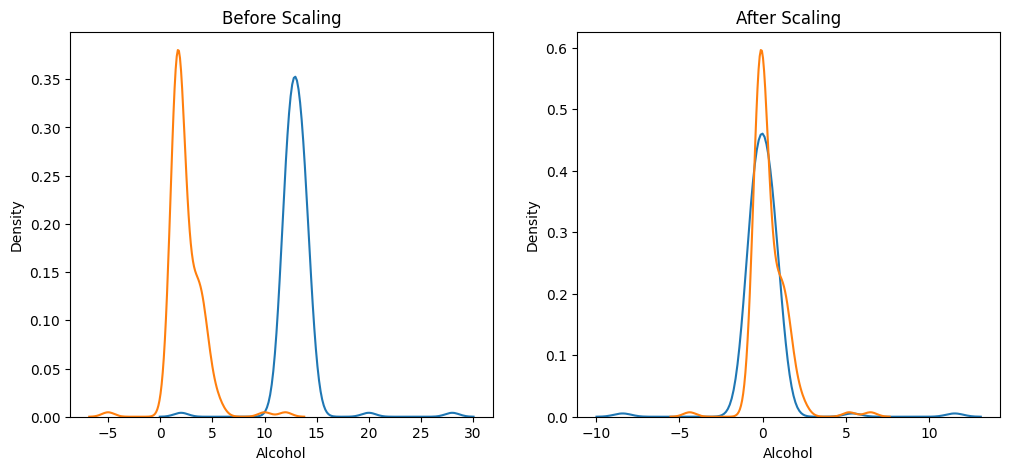

In [33]:
# now kde plot

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()

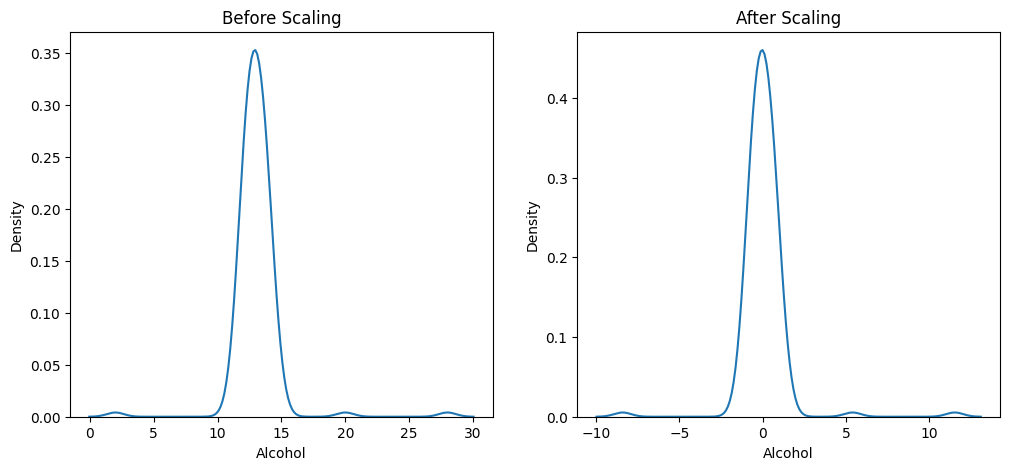

In [34]:
# now individually with alcohol

fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Alcohol"],ax=ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Alcohol"],ax=ax2)
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()

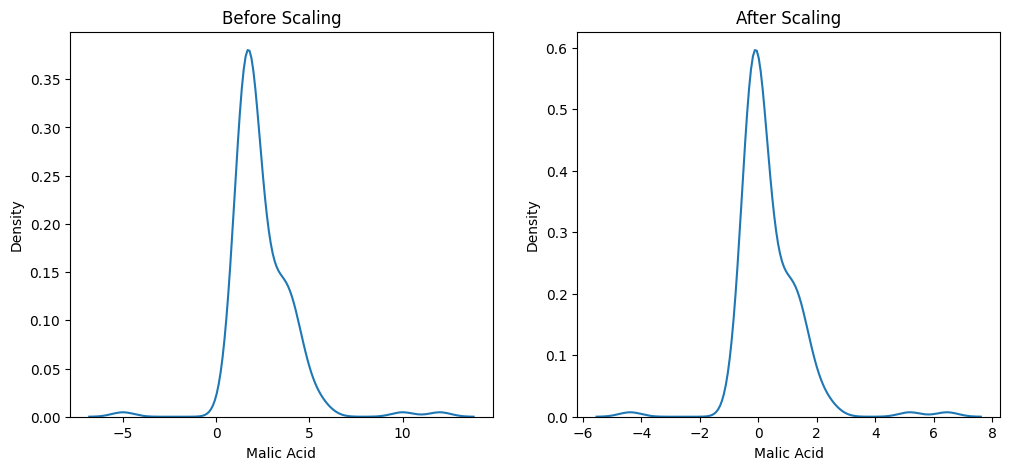

In [35]:
# with malic acid

fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x=x_train["Malic Acid"],ax=ax1)
ax1.set_xlabel("Malic Acid")
ax1.set_ylabel("Density")
ax1.set_title("Before Scaling")
sns.kdeplot(x=x_train_scaled["Malic Acid"],ax=ax2)
ax2.set_xlabel("Malic Acid")
ax2.set_ylabel("Density")
ax2.set_title("After Scaling")
plt.show()
